## Identitas

Nama : Ony Novianti    
Kelas : TI-3A          
NIM   : 2041720029


## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [316]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

In [317]:
# import library
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score

In [318]:
# Read Data
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## JAWAB

In [319]:
# Karena data sex, smoker, dan dan region berupa nominal categories, maka dapat di mapping seperti berikut: 
# Me replace String ke number
data['sex'] = data['sex'].apply({'male':0,      'female':1}.get) 
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [320]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### KORELASI ANTAR VARIABEL

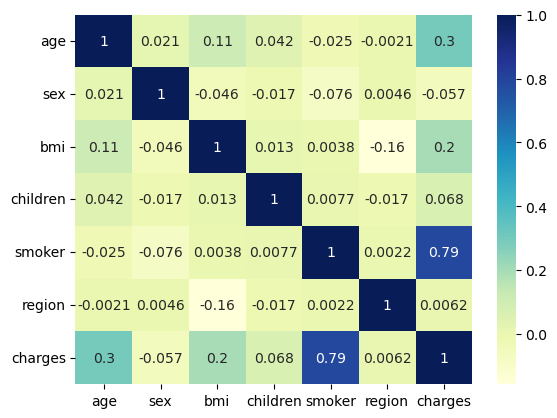

In [321]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

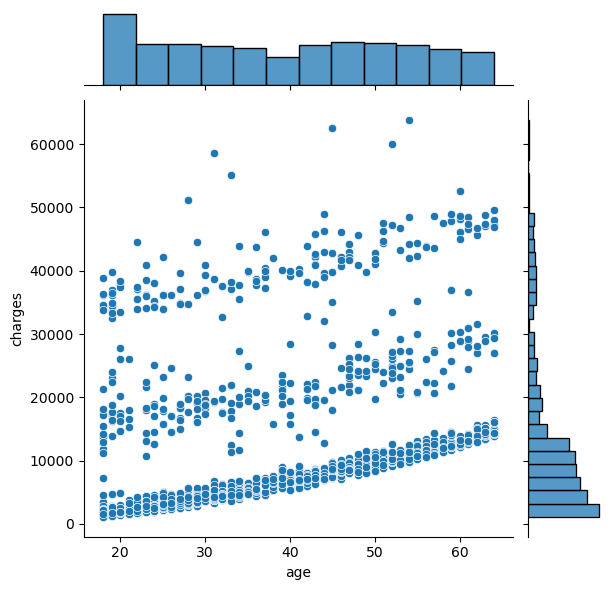

In [322]:
# Menemukan korelasi independen dan dependen variabel

# Korelasi charges dan umur
sns.jointplot(x=data['age'],y=data['charges'])

### Dapat dilihat bahwa dengan meningkatnya umur maka charges juga akan meningkat

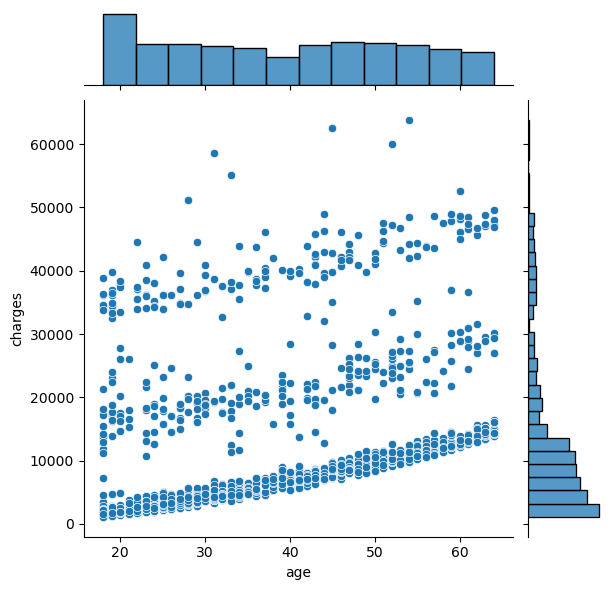

In [323]:
# Korelasi charges dan umur
sns.jointplot(x=data['age'],y=data['charges'])

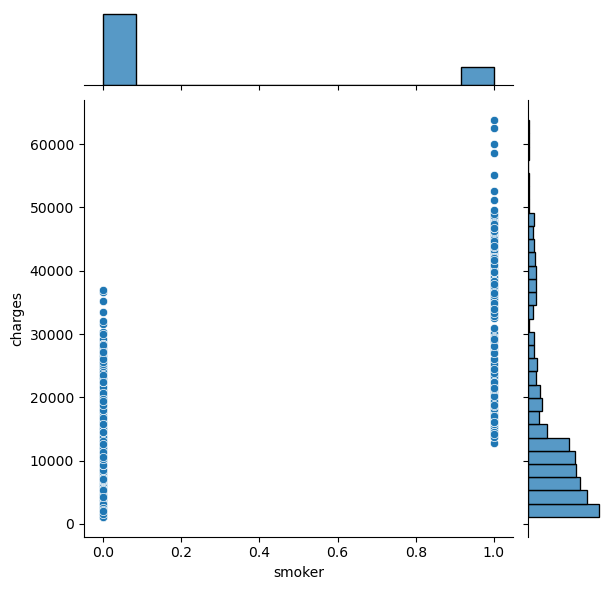

In [324]:
# Korelasi antara smoker dan charges
sns.jointplot(x=data['smoker'],y=data['charges'])

###  Charge untuk smoker(perokok) lebih tinggi daripada non-smoker(bukan perokok)

In [325]:
# Independen Variabel
X = data[['age', 'sex', 'bmi', 'children','smoker','region']]

# Dependen variabel
y = data['charges']

In [326]:
# Split train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [327]:
# Train dan test model
model = LinearRegression()

# Fit linear model by passing training dataset
model.fit(X_train,y_train)

LinearRegression()

In [328]:
# Memprediksi target variabel untuk set data
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

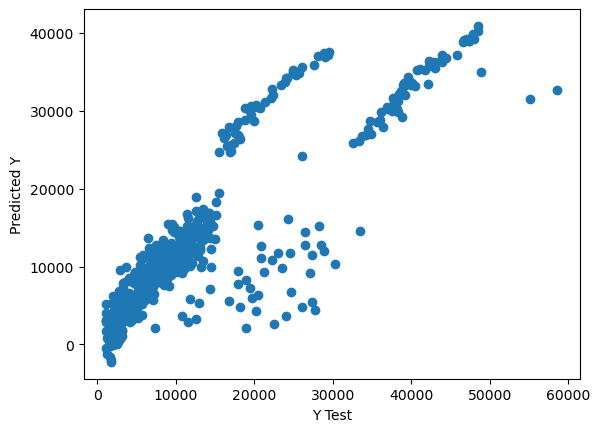

In [329]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Contoh tambah data baru untuk cek Charges

In [330]:
data = {'age' : 21,
        'sex' : 1,
        'bmi' : 40.00,
        'children' : 0,
        'smoker' : 0,
        'region' : 2}
index = [1]
ony_df = pd.DataFrame(data,index)
ony_df

,age,sex,bmi,children,smoker,region
1,21,1,40.0,0,0,2


In [331]:
ony_prediksi = model.predict(ony_df)
print("Asuransi Medis untuk Ony : ",ony_prediksi)

Asuransi Medis untuk Ony :  [5549.92430606]


### EVALUASI MENGGUNAKAN R-SQUARE

In [332]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [333]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7573453057844618

### Kesimpulan

Kesimpulannya adalah, hasil yang didapat berbeda, karena y_pred juga berbeda. Untuk hasil yang pertama membuat data baru untuk mengecek apakah model dapat memprediksi jika ada kasus baru. Untuk penggunaan r_squared didapat hasil secara keseluruhan dari linearRegression, tidak untuk satu data.